Link to the Dataset
https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

In [ ]:
from torch import nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = np.genfromtxt('/content/Boston.csv',
                     dtype = np.float32,
                     delimiter=',',
                     skip_header=1)

In [ ]:
data_x = np.array(data[:,1:14])
data_y = np.array(data[:,-1])

In [ ]:
x = torch.tensor(data_x,dtype = torch.float32)
y = torch.tensor(data_y,dtype = torch.float32)

In [ ]:
print(x.shape)
print(y.shape)

torch.Size([506, 13])
torch.Size([506])


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.33,random_state=42)

In [ ]:
x_train = torch.tensor(X_train,dtype = torch.float32)
y_train = torch.tensor(Y_train.reshape(-1,1),dtype = torch.float32)

x_test = torch.tensor(X_test,dtype = torch.float32)
y_test = torch.tensor(Y_test.reshape(-1,1),dtype = torch.float32)

<ipython-input-282-ef5e0006ccb5>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(X_train,dtype = torch.float32)
<ipython-input-282-ef5e0006ccb5>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(Y_train.reshape(-1,1),dtype = torch.float32)
<ipython-input-282-ef5e0006ccb5>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(X_test,dtype = torch.float32)
<ipython-input-282-ef5e0006ccb5>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clon

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([339, 13])
torch.Size([339, 1])
torch.Size([167, 13])
torch.Size([167, 1])


In [ ]:
class LinearRegression(torch.nn.Module):            
  def __init__(self):
    super().__init__()
    self.linear1 = torch.nn.Linear(13,32)
    self.linear2 = torch.nn.Linear(32,16)
    self.linear3 = torch.nn.Linear(16,1)
    self.activation =torch.nn.ReLU()


  def forward(self,x):
    x=self.linear1(x)
    x = self.activation(x)
    x=self.linear2(x)
    x = self.activation(x)
    x=self.linear3(x)
    return x 

In [ ]:
model = LinearRegression()

In [ ]:
criterion = torch.nn.MSELoss()
LearningRate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=LearningRate)

In [ ]:
num_epochs = 50000
loss_list = []
for epoch in range(num_epochs):
  y_hat = model(x_train)
  loss = criterion(y_hat,y_train)
  loss_list.append(loss.item())

  # backward
  loss.backward()
  # update
  optimizer.step()

  optimizer.zero_grad()

  if epoch % 5000 == 0:
    print(f'Epoch: [{epoch+1}/{num_epochs}] Loss: [{loss.item():.6f}]')


Epoch: [1/50000] Loss: [1085.416382]
Epoch: [5001/50000] Loss: [6.423667]
Epoch: [10001/50000] Loss: [4.247351]
Epoch: [15001/50000] Loss: [3.931188]
Epoch: [20001/50000] Loss: [3.734230]
Epoch: [25001/50000] Loss: [3.420225]
Epoch: [30001/50000] Loss: [3.316399]
Epoch: [35001/50000] Loss: [3.135058]
Epoch: [40001/50000] Loss: [3.066952]
Epoch: [45001/50000] Loss: [3.003301]


In [ ]:
y_pred = model(x_test)

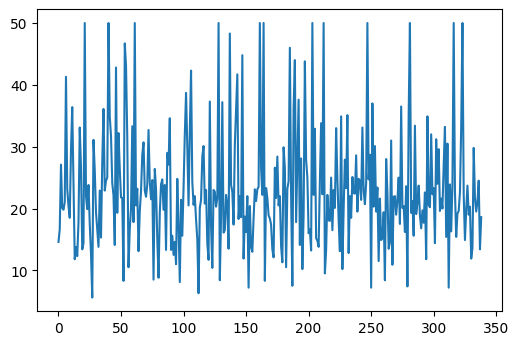

In [ ]:
plt.figure(dpi = 100)
plt.plot(y_train)
plt.show()

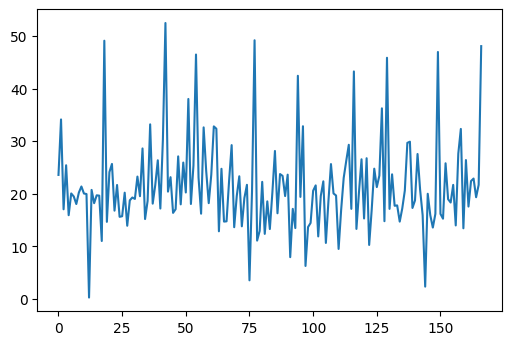

In [ ]:
plt.figure(dpi = 100)
plt.plot(y_pred.detach().numpy())
plt.show()